# Analyzing Flight Data

Python is a powerful tool that is often used to model and quantify nature. It is the programming language of choice for many people because of its simplicty and versatility. I often find myself coding things up just for fun. This tutorial assumes some prior knowledge of simple python syntax. A good starting point can be found on codeacademy.com, a nice introduction to basic programming. This tutorial also assumes that anaconda is installed on the machine.

In this tutorial, I will walk you through what I normally do to analyze data. We will look at some of the raw data collected by the pioneering ** *Effective-0.25* **rocket when Kent and I launched it in the summer. I go through every aspect of my analysis of the dataset in detail. Hopefully this notebook is instructive and cohesive.

Analyzing data is a lot of fun for me, and hopefully I can communicate that fun to you! Lets get started!

### Importing packages:

Anaconda contains nearly all of the scientific packages you need to efficiently and effectively create models and analyze data. We import specific packages that are useful to the problem at hand.

In order to perform mathematical operations and plot data, we will need to import numpy and matplotlib, like this:

In [1]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline

The third line explicitly tells matplotlib to plot inside of your jupyter notebook instead of saving a .png image onto your machine.

Another tool that is useful is astropy. It is used mainly by astronomers (who are usually not the best programmers) to jump the learning curve. Specifically, astropy's ascii module contains functions that quickly and easily read and write plain text files.

In [2]:
from astropy.io import ascii

Similarly, to execute specific functions, we will often find ourselves importing them a bit like this:

In [3]:
from scipy.integrate import quad                        # A fast integrator
from scipy.interpolate import interp1d                  # An interpolator
from scipy.ndimage.filters import gaussian_filter1d     # A Gaussian smoother

Great! Now that we have our relevant packages imported, we can start looking at a dataset!

### Reading in data:

Most datasets come in a simple text file, where columns of data are spaced apart by tabs. This is called the file's delimiter. Often there will be some data or text that is not in the column before the column data starts. We can avoid that by setting the data_start variable inside of the read-in.

Reading in a file looks like this:

In [4]:
ascii.read('Fanky_test1_data.txt', data_start = 2)

col1,col2,col3,col4,col5,col6,col7,col8
float64,float64,float64,float64,float64,float64,float64,int64
1502533395.89,-6.0,-264.0,45.0,90.37,1002.45,110.75,90
1502533395.93,-10.0,-285.0,49.0,90.37,1002.44,110.75,90
1502533395.97,-5.0,-248.0,31.0,90.37,1002.44,110.75,0
1502533396.0,3.0,-244.0,47.0,90.72,1002.4,110.75,0
1502533396.04,6.0,-274.0,37.0,90.72,1002.4,110.822,0
1502533396.07,7.0,-259.0,30.0,90.04,1002.48,110.822,0
1502533396.11,7.0,-281.0,33.0,90.04,1002.48,110.84,0
1502533396.15,1.0,-269.0,31.0,87.52,1002.78,110.84,0
1502533396.18,1.0,-264.0,39.0,87.52,1002.78,110.84,0


In order to access the data in the file (and to make life simpler), we name this table something:

In [5]:
data = ascii.read('Fanky_test1_data.txt', data_start = 2)

Cool! We have data! Now let's isolate the individual columns and name them!

Here's how I do that:

In [6]:
# Raspberry pi local time:
t = data['col1']

# 3-axis accelerometer data:
y = data['col3']
x = data['col2']
z = data['col4']

# Altimeter data:
alt = data['col5'] # altitude
temp = data['col7'] # temperature, F
p = data['col6'] # pressure

# Servo data:
d = data['col8'] # servo position angle

Now let's plot it up and see what it looks like!

### Plotting:

Plotting is simple and fun. It's my second favorite aspect of all of this! For now, we will only care about plotting in 2D. The basic syntax looks like this:

plot(x,  y,  line style,  color,  line opacity,   label)

Below are some examples where I'll be plotting different columns of data over time. Neglect for now the weird values on the axes. We will convert those later.

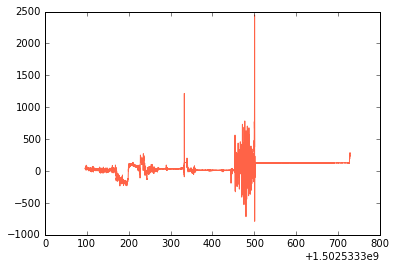

In [7]:
plot(t, z, '-', color = 'tomato', alpha = 1., label = 'z_data')

Alpha sets the opacity of the line. 1 is the maximum value, where you get the full color of the line. In order to view the label, we need to turn on the 'legend' command, like this: 

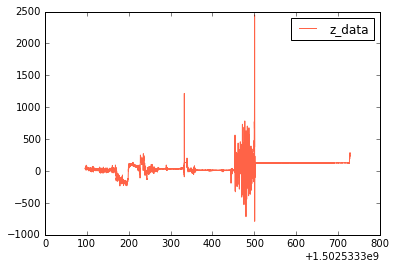

In [8]:
plot(t, z, '-', color = 'tomato', alpha = 1., label = 'z_data')
legend()

Cool! Now let's label the axes, give it a title, add some grids, and get rid of that weird text thing above the plot.

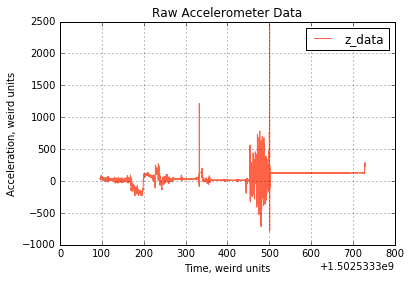

In [9]:
plot(t, z, '-', color = 'tomato', alpha = 1., label = 'z_data')
legend()
xlabel('Time, weird units')
ylabel('Acceleration, weird units')
title('Raw Accelerometer Data')
grid()  # This adds those pretty gridlines which I really like
show()  # This gets rid of the text above the plot

Cool! That looks great! Now why don't we make the plot a little bit bigger, and add the other two accelerometer columns.

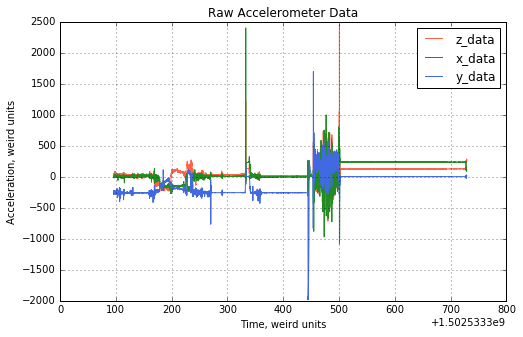

In [10]:
figure(figsize = (8, 5)) # Sets plot dimensions

plot(t, z, '-', color = 'tomato', alpha = 1., label = 'z_data')
plot(t, x, '-', color = 'forestgreen', alpha = 1., label = 'x_data')
plot(t, y, '-', color = 'royalblue', alpha = 1., label = 'y_data')
legend()
xlabel('Time, weird units')
ylabel('Acceleration, weird units')
title('Raw Accelerometer Data')
grid()
show()

Nice. Now let's zoom in on the interesting stuff! Remember: this data includes us prepping the rocket on the pad, shoving the electronics into the rocket, the rocket parachuting down for a minute or two, and the rocket sitting around on the ground.

### A Minor Tangent

Before we zoom in, let's make the x-axis more readable by doing math with the time column.

In [11]:
t = data['col1'] - data['col1'][0] 

We're normalizing the weird time axis (which is some raw computer format time) to the very first value. Thankfully the units are seconds, so this works fine!

Now let's normalize the accelerometer data from raw sensor units to units of acceleration. We know for a fact that the y-axis data corresponds to the vertical extent of the rocket. Notice how at around 300 seconds the y_data curve sits below the other two axes. That's because the rocket feels a downward acceleration due to gravity when it's sitting on the launch pad. This is reflected in the vertical axis accelerometry. We know that g is 9.81 $\frac{m}{s^2}$, so we will leverage this to solve for $a$, the acceleration.

Let's first isolate the 300th y-axis measurement and do math with it:

In [12]:
print y[where(t >= 300)][0]

-257.0


The syntax there is simple: print the y-value of the array, specifically at the exact point where t first becomes greater than 300 seconds. The [0] selects the first value in the array of values where the condition t > 300 seconds is met.

Great! We find that g = 9.81 $\frac{m}{s^2}$ = -257.0 in sensor units. 

Thus the conversion factor is a = -a * $\frac{257}{9.81}$. We recompute the accelerometer data accordingly.

Lastly, we subtract gravity from the y-axis accelerometer. Even though it reads 1g vertically, the rocket is stationary on the pad, so this makes intuitive sense.

In [13]:
k = -9.81 / 257.

# 3-axis accelerometer data:
y = data['col3']*k - 9.81
x = data['col2']*k
z = data['col4']*k

Great, let's see if that worked.

#### Back to plotting!

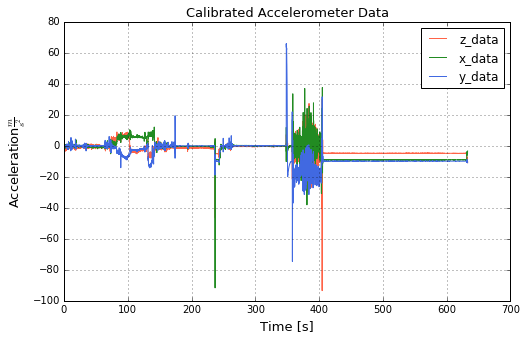

In [14]:
figure(figsize = (8, 5)) # Sets plot dimensions

plot(t, z, '-', color = 'tomato', alpha = 1., label = 'z_data')
plot(t, x, '-', color = 'forestgreen', alpha = 1., label = 'x_data')
plot(t, y, '-', color = 'royalblue', alpha = 1., label = 'y_data')
legend()
xlabel('Time [s]', fontsize = 13)
ylabel('Acceleration' + r'$\frac{m}{s^{2}}$', fontsize = 13)
title('Calibrated Accelerometer Data', fontsize = 13)
grid()
show()

That clearly worked!!! Cool! Now let's zoom in on the actual launch and look at the most interesting subset of data, the y-acceleration! This is what we've been planning on doing for a while.

### Preliminary Plot Analysis

It looks like the rocket is sitting still on the pad from 250 to 350 seconds, takes off at t = 350, and falls until t = 405. While the parachute descent data might be interesting to some, I am most interested in the burn and coast phase data. We will zoom in on this, and normalize the time axis yet again to align with launch. And let's go ahead and add the other axes back in.

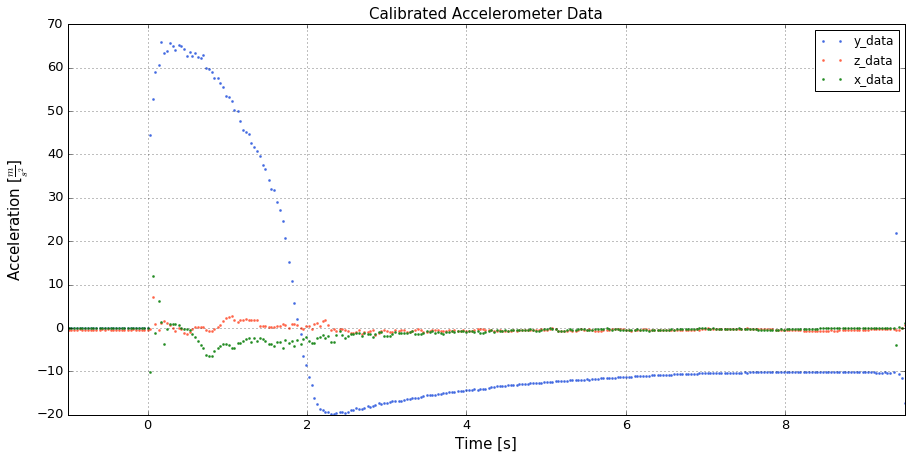

In [15]:
figure(figsize = (15, 7)) # Sets plot dimensions

plot(t-348.4, y, '.', color = 'royalblue', markersize = 4, alpha = 1., label = 'y_data')
plot(t-348.4, z, '.', color = 'tomato', markersize = 4, alpha = 1., label = 'z_data')
plot(t-348.4, x, '.', color = 'forestgreen', markersize = 4, alpha = 1., label = 'x_data')
legend()
xlabel('Time [s]', fontsize = 15)
ylabel('Acceleration' + r' [$\frac{m}{s^{2}}$]', fontsize = 15)
title('Calibrated Accelerometer Data', fontsize = 15)
grid()

tick_params(axis='x', labelsize=13)
tick_params(axis='y', labelsize=13)


xlim(-1, 9.5)
ylim(-20, 70)
show()

Now that we have this nice plot, we can think about what's going on here physically. This will be the impetus for the rest of this analysis. Here's what I noticed:

* The shape of the y-axis data. What accounts for its shape? The shape of the y-acceleration is truly the most important aspect of the rocket's flight. We will go into depth analyzing it, but for now, suffice it to say that there are two obvious components: the burn phase and the pretty-looking coast phase deceleration. The burn phase curve closely follows the thrust profile of the motor (which we will also get into), and the coast phase curve is set by the mass and aerodynamics of the rocket. 


* At t = 0 we see the rocket take off. All three axes jump at the start of the motor burn. The first vertical measurement shows an acceleration of 45 m/s^2. The slope of the acceleration, also known as "jerk", is very high here, and our data acquisition rate is too low to properly capture acceleration during motor ignition. We will need to analyze this.


* The x- and z-axis accelerometers show a lot of variability in the first two seconds. This indicates that the rocket was wobbling during motor burn. Video footage corroborates this. What could account for this? My hypothesis is that the launch pad was not stable, and the rocket exerted a torque because its launch lugs fit tightly over the launch rod. Another possibility is that the rocket's airframe warped in flight. The avionics section of the rocket was poorly secured to the rocket and wobbles if you shake it. That would cause it to precess. Another possibility is that having the camera onboard could have pushed the rocket's center of mass out of the plane of the rocket's vertical axis enough to cause strange rotational effects. Lastly, we can blame wind effects for pushing the rocket. Indeed, we launched it in 30 mph gusts. This is why we need a safety team.

To make life easier, I decided to cut out the extraneous data and just keep the burn and coast phase data. This makes the math quicker and the plots easier. I'll redefine the variables below. This was a 2-minute guess-and-check job.

In [16]:
# Raspberry pi local time:
t = data['col1'][9855:-7788] - data['col1'][9855]

# 3-axis accelerometer data:
y = (data['col3'][9855:-7788])*k - 9.81
x = (data['col2'][9855:-7788])*k
z = (data['col4'][9855:-7788])*k

# Altimeter data:
alt = data['col5'][9855:-7788]
temp = data['col7'][9855:-7788]
p = data['col6'][9855:-7788]

# Servo data:
rad = data['col8'][9855:-7788]

## Analysis

Accelerometer data can be integrated to find velocity. Let's start this analysis by creating a plot of the velocity of the rocket over time.

Numerical integration is simple: we're finding the area under the curve. More explicitly, we perform a trapezoidal sum on our data. The heights of the two arms of the trapezoid are the data points of the function $f$, and the base of the trapezoid is the time spacing between the two points, $\delta$t. The area of a trapezoid is then given by:

\begin{equation}
a(t) = \frac{(f_{1} + f_{2})(t_{2}-t_{1})}{2} = \frac{1}{2\delta t_{2,1}}(f_{1} + f_{2})
\end{equation}

The integral of this function is a running sum over time of the individual areas:

\begin{equation}
I(t) = \sum_{n=0}^{i} a_{n}
\end{equation}

We implement this with a general function that can solve for both the inertial velocity and the inertial altitude.

In [17]:
def integrate(t, f):
    # t is the time array, f is the data array
    integral = zeros(len(t))-1
    integral_sum = 0
    
    for i in range(1, len(t)):
        delta_t = (t[i]-t[i-1])/2.
        integral_sum += (f[i]+f[i-1])* delta_t    
        integral[i] = integral_sum
        
    return integral

In [18]:
# Now, we put the data through the function and obtain the rocket's flight profiles

v = integrate(t, y)
a = integrate(t, v)

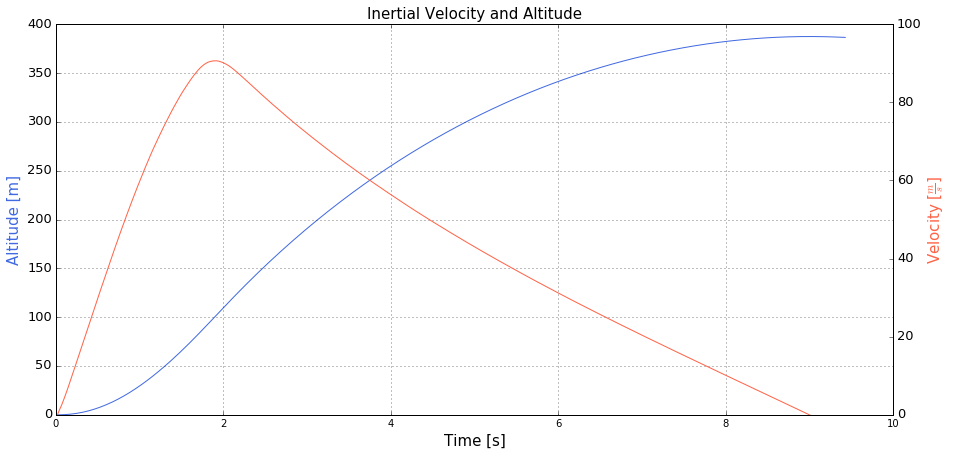

In [19]:
figure(figsize = (15, 7))

xlabel('Time [s]', fontsize = 15)
grid()
plot(t, a, color = 'royalblue')
ylabel('Altitude [m]', color = 'royalblue', fontsize = 15)
ylim(0, 400)
tick_params(axis='y', labelsize=13)
twinx()

plot(t, v, color = 'tomato')
ylabel('Velocity' + r' [$\frac{m}{s}$]', color = 'tomato', fontsize = 15)
ylim(0, 100)

title('Inertial Velocity and Altitude', fontsize = 15)

tick_params(axis='x', labelsize=13)
tick_params(axis='y', labelsize=13)

show()

### Inertial Altitude and Velocity

Great! We have a nice plot of both the altitude and the velocity of the rocket in the inertial reference frame. Since we also have altitude from the altimeter, why don't we plot it up with the inertial data and see how they compare? Here we go:

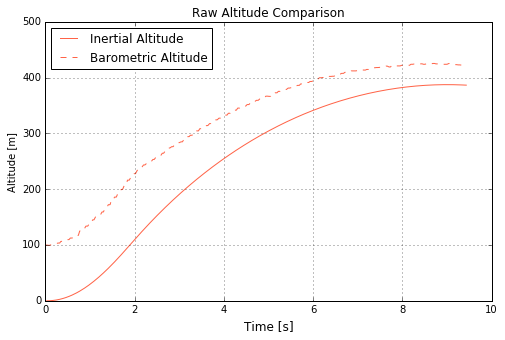

In [20]:
figure(figsize = (8, 5))

xlabel('Time [s]', fontsize = 12)
grid()
plot(t, a, color = 'tomato', label = 'Inertial Altitude')
plot(t, alt, '--', color = 'tomato', label = 'Barometric Altitude')
ylabel('Altitude [m]')
title('Raw Altitude Comparison')
legend(loc = 'best') # Setting the legend box to be placed smartly on the plot
ylim(0, 500)
show()

Whoa! What happened there? It looks like our initial barometric altitude reading is something like 100 meters. I guess we launched above sea level, even though it totally felt like we were in Death Valley. Let's normalize that to 0 and reset variable "alt" and try that again:

In [21]:
alt = data['col5'][9855:-7788] - data['col5'][9855]

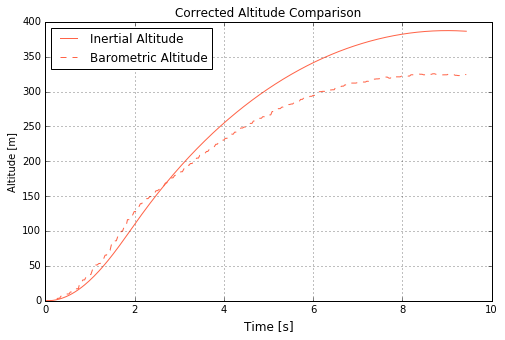

In [22]:
figure(figsize = (8, 5))

xlabel('Time [s]', fontsize = 12)
grid()
plot(t, a, color = 'tomato', label = 'Inertial Altitude')
plot(t, alt, '--', color = 'tomato', label = 'Barometric Altitude')
ylabel('Altitude [m]')
title('Corrected Altitude Comparison')
legend(loc = 'best')
ylim(0, 400)
show()

There an interesting discrepancy here: the two plots don't line up perfectly! Why not? Asking questions like these tells us about the rocket's properties and the nature of our measurements. We will talk about what's happening in the Results section a bit later. For now, let's push on with our analysis!

### Barometric Velocity
Now we can use the altimeter data to actually find the rocket's velocity profile and compare it to the inertial data. Finding velocity given an altitude requires taking the derivative of altitude. We write a quick function that finds the slope between each pair of points. The math is simple: take the difference of the two data points and divide it by their $\delta$t.

In [23]:
def derive(t, f):
    derivatives = zeros(len(t))-1
    for i in range(1, len(t)):
        delta_t = (t[i-1]-t[i])
        derivatives[i] = (f[i-1] - f[i])/delta_t
    return derivatives

In [24]:
alt_v = derive(t, alt)

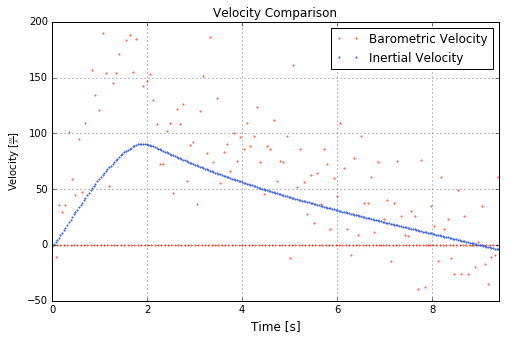

In [25]:
figure(figsize = (8, 5))

plot(t, alt_v, '.', markersize = 3., color = 'tomato', label = 'Barometric Velocity')
plot(t, v, '.', markersize = 3., color = 'royalblue', label = 'Inertial Velocity')

ylabel('Velocity'+ r' [$\frac{m}{s}$]')
xlabel('Time [s]', fontsize = 12)
title('Velocity Comparison')
legend(loc = 'best')

xlim(0, 9.4)
ylim(-50, 200)
grid()
show()

#### What the...

What's up with that plot? It looks like a lot of the points are just zero... And the velocities are all higher than the inertial velocity. Let's zoom in on the barometric altitude plot and see what's going on.

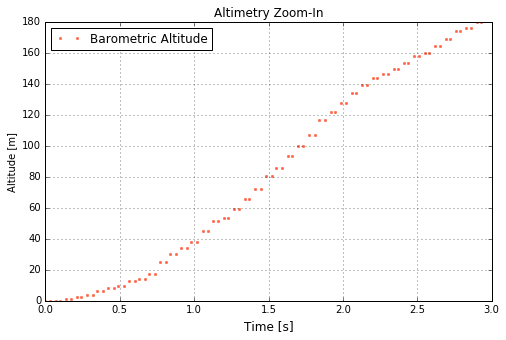

In [26]:
figure(figsize = (8, 5))

xlabel('Time [s]', fontsize = 12)
grid()
plot(t, alt, '.', markersize = 5., color = 'tomato', label = 'Barometric Altitude')
ylabel('Altitude [m]')
title('Altimetry Zoom-In')
legend(loc = 'best')
ylim(0, 180)
xlim(0, 3)
show()

Ah, there's our problem! The slope between each point is zero, and the slope between every other point is greater than the actual slope of the line. Additionally, the space between points changes throughout the dataset. I would call this issue "aliasing". 

A good way to get around the slope issue is to instead take the derivative of every other point, and then to smooth the data out with a Gaussian kernel. Check it out:

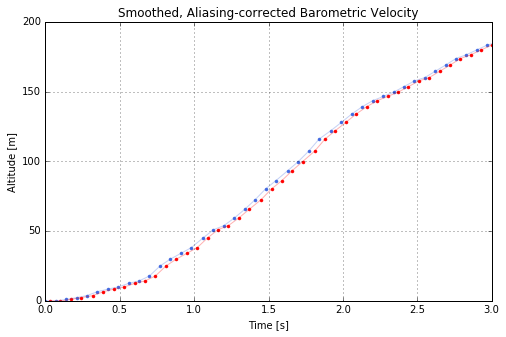

In [27]:
smooth_v = gaussian_filter1d((alt)[::2], 0.5)  # smoothes out every other point
smooth_v2 = gaussian_filter1d((alt)[1:-1][::2], 0.5) # smoothes out the other ones

figure(figsize = (8, 5))
plot(t[::2], smooth_v, '.', color = 'royalblue', markersize = 6.)
plot(t[1:-1][::2], smooth_v2, '.', color = 'red',  markersize = 6.)

plot(t[::2], smooth_v, '-', color = 'royalblue', alpha = 0.3)
plot(t[1:-1][::2], smooth_v2, '-', color = 'red',  alpha = 0.3)

xlim(0, 3)
ylim(0, 200)
xlabel('Time [s]')
ylabel('Altitude [m]')
title('Smoothed, Aliasing-corrected Barometric Velocity')
grid()

Great, I've managed to isolate the two effective velocity plots. I still have no idea what went wrong in our control loop to create the aliasing issue, but at least now we're on our way to making a better velocity plot.

Let's average out the two smoothed-out altitude plots and take their derivatives using the same function we wrote above.

(0, 9.4)

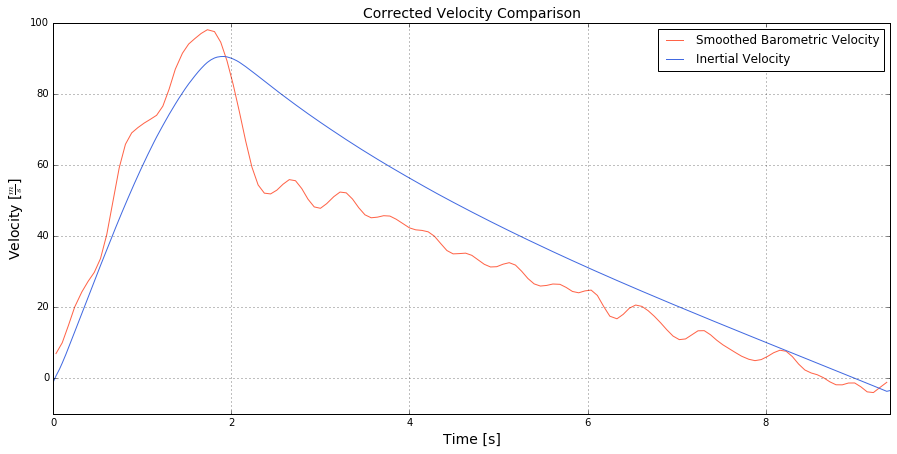

In [28]:
dadt = derive(t[::2], smooth_v) # Derivative 1
dadt2 = derive(t[1:-1][::2], smooth_v2) # Derivative 2

smooth3 = gaussian_filter1d(0.5*(dadt[1:]+dadt2), 1.8) # A smoothed-out average of the two

figure(figsize = (15, 7))

plot(t[1:-1][::2], smooth3, color = 'tomato', label = 'Smoothed Barometric Velocity')
plot(t, v, '-', markersize = 3., color = 'royalblue', label = 'Inertial Velocity')
legend(loc = 'best')

title('Corrected Velocity Comparison', fontsize = 14)
xlabel('Time [s]', fontsize = 14)
ylabel('Velocity'+ r' [$\frac{m}{s}$]', fontsize = 14)

grid()

ylim(-10, 100)
xlim(0, 9.4)

Solid. We now have something that makes sense. It's clearly very noisy and does not follow the inertial profile well. We will talk about why that is in a later section. Now, let's see what's up with the time data.

The best way to do that would be to view the time difference $\delta$t between each data point. Below is a simple for-loop that plots the difference between each data point as a function of time.

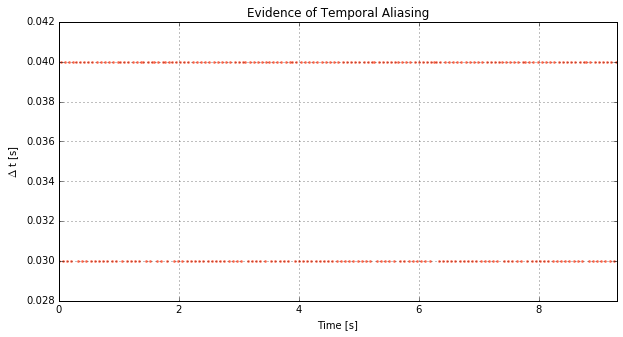

In [29]:
figure(figsize = (10, 5))

for i in range(0, len(t)-1):
    plot(t[i], (abs(t[i] - t[i+1])), '.', markersize = 4., color = 'tomato')
    
grid()
xlim(0, 9.3)
xlabel('Time [s]')
ylabel('$\Delta$ t [s]')
title('Evidence of Temporal Aliasing')

show()

We notice that the time difference between points is:

* Below our intended data acquisition rate of 50 Hz (0.02 s)
* Switching between two values

This is a problem. We want our control loop to reliably acquire sensor data at a fixed rate. We strive to achieve a rate of 200 Hz (0.005 s) in order to have the precision necessary to have the ADAS system super accurate.

These are the takeaways:

* Inertial and barometric altitude show quite different results
* The altimeter data exhibited significant aliasing

### Parachute Descent Rate

Now let's analyze the less exciting half of the altimetry data: the parachute descent.

We start by plotting up the whole altitude dataset. The only problem is that we truncated our variables $alt$ and $t$ to only include the ascent data. Let's redefine them (and use guess-and-check) to include the descent data.

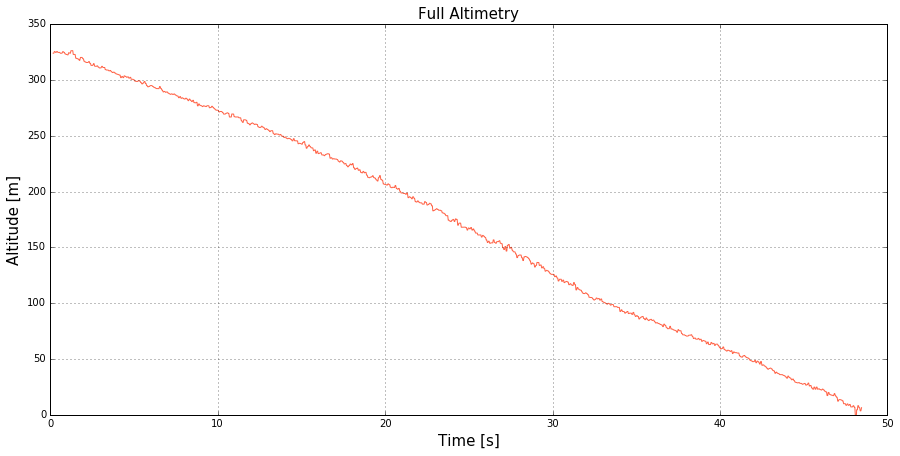

In [30]:
t = data['col1'][10095:-6449] - data['col1'][10090]
alt = data['col5'][10095:-6449] - data['col5'][9855]

figure(figsize = (15, 7))
plot(t, alt, color = 'tomato')
xlabel('Time [s]', fontsize = 15)
ylabel('Altitude [m]', fontsize = 15)
title('Full Altimetry', fontsize = 15)

xlim(0, 50)
ylim(0, 350)
grid()
show()

Let's perform a similar analysis here. We will do the whole smoothing thing.

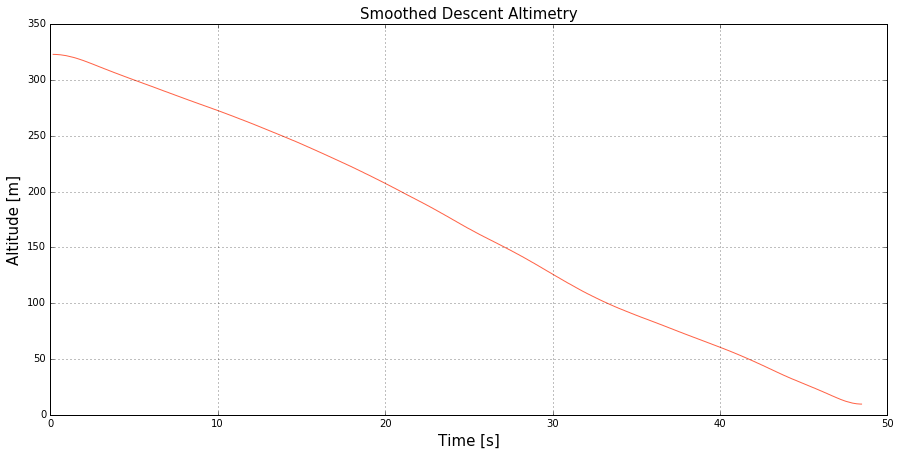

In [31]:
smooth_descent = gaussian_filter1d(alt, 30) # The number signifies the degree of smoothing

figure(figsize = (15, 7))
xlabel('Time [s]', fontsize = 15)
ylabel('Altitude [m]', fontsize = 15)
title('Smoothed Descent Altimetry', fontsize = 15)
plot(t, smooth_descent, color = 'tomato')
xlim(0, 50)
ylim(0, 350)
grid()
show()

Okay, now let's take its derivative and get the descent velocity. We'll copy and paste the same exact code as above, this time looking at a different time range.

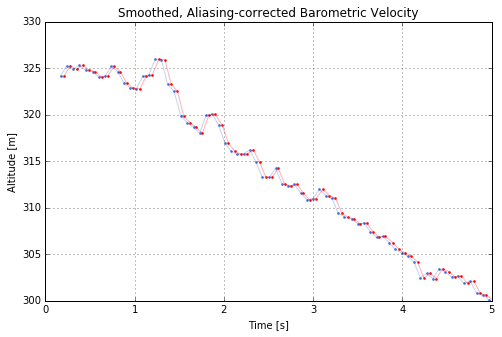

In [32]:
smooth_v = gaussian_filter1d((alt)[::2], 0.5)  # smoothes out every other point
smooth_v2 = gaussian_filter1d((alt)[1:-1][::2], 0.5) # smoothes out the other ones

figure(figsize = (8, 5))
plot(t[::2], smooth_v, '.', color = 'royalblue', markersize = 4.)
plot(t[1:-1][::2], smooth_v2, '.', color = 'red',  markersize = 4.)

plot(t[::2], smooth_v, '-', color = 'royalblue', alpha = 0.3)
plot(t[1:-1][::2], smooth_v2, '-', color = 'red',  alpha = 0.3)

xlim(0,5)
ylim(300, 330)
xlabel('Time [s]')
ylabel('Altitude [m]')
title('Smoothed, Aliasing-corrected Barometric Velocity')
grid()

(0, 50)

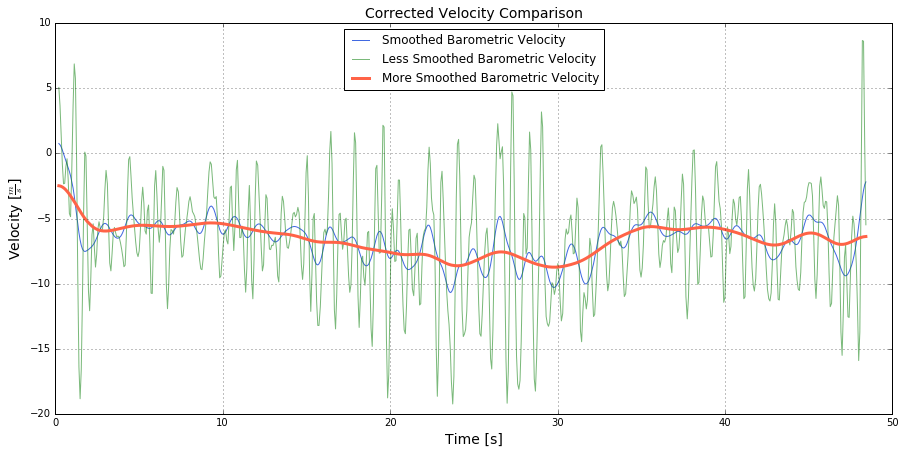

In [33]:
dadt = derive(t[::2], smooth_v) # Derivative 1
dadt2 = derive(t[1:-1][::2], smooth_v2) # Derivative 2

smooth3 = gaussian_filter1d(0.5*(dadt[1:]+dadt2), 5.) # A smoothed-out average of the two
smooth4 = gaussian_filter1d(0.5*(dadt[1:]+dadt2), 15.) 
smooth5 = gaussian_filter1d(0.5*(dadt[1:]+dadt2), 1.5) 

figure(figsize = (15, 7))

plot(t[1:-1][::2], smooth3, color = 'royalblue', label = 'Smoothed Barometric Velocity')
plot(t[1:-1][::2], smooth5, color = 'forestgreen', alpha = 0.6, label = 'Less Smoothed Barometric Velocity')
plot(t[1:-1][::2], smooth4, linewidth = 3, color = 'tomato', label = 'More Smoothed Barometric Velocity')
legend(loc = 'best')

title('Corrected Velocity Comparison', fontsize = 14)
xlabel('Time [s]', fontsize = 14)
ylabel('Velocity'+ r' [$\frac{m}{s}$]', fontsize = 14)

grid()

ylim(-20, 10)
xlim(0, 50)

Clearly the noisiness here isn't just due to turbulence associated with a tumbling descent because the unsmoothed plot shows positive velocities. Now let's just look at the smoothed profile and find its best-fit slope. The slope of the line tells us about how badly the parachutes tangle. If the rocket accelerates on its way down, that means the parachutes are not performing optimally. The mean will give us the mean descent rate, a more useful number. Finding a best fit line isn't hard, check it out:

In [34]:
slope, intercept = polyfit(t[1:-1][::2], smooth4, 1)
mean_descent_rate = mean(smooth4)

time = linspace(0, 50, len(smooth4)) # arbitrary array of times from 0 to 50 seconds for plot

In [35]:
print 'Descent acceleration =', slope,'m/s^2.' 

print 'Mean descent rate =', mean_descent_rate, 'm/s'

Descent acceleration = -0.0287728858232 m/s^2.
Mean descent rate = -6.59618531568 m/s


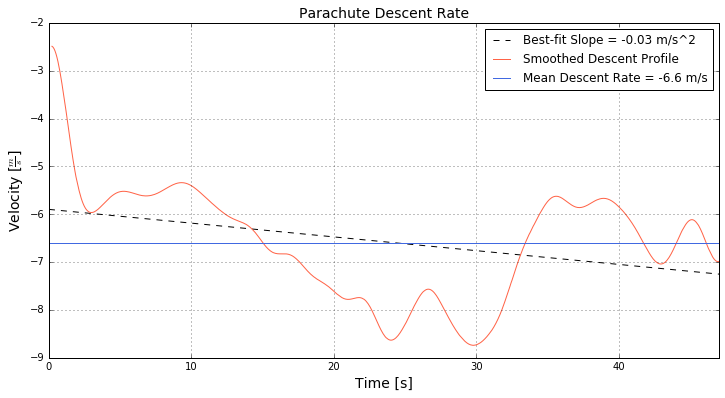

In [36]:
figure(figsize = (12, 6))

plot(time, intercept+slope*time, '--', color = 'black', label = 'Best-fit Slope = -0.03 m/s^2')
plot(t[1:-1][::2], smooth4, linewidth = 1, color = 'tomato', label = "Smoothed Descent Profile")
plot(time, mean_descent_rate + 0.*time, color = 'royalblue', label = 'Mean Descent Rate = -6.6 m/s')
legend(loc = 'best')

xlim(0, 47)

ylabel('Velocity'+ r' [$\frac{m}{s}$]', fontsize = 14)
xlabel('Time [s]', fontsize = 14)
title('Parachute Descent Rate', fontsize = 14)

grid()

Cool! Looks like we were descending at 6.6 m/s. Our descent kinetic energy is therefore:

In [37]:
mass_rocket = 0.8 # kg

print 'Kinetic energy =', 0.5 * mass_rocket * (6.6**2), 'Joules.'

Kinetic energy = 17.424 Joules.


We can check the NASA Student Launch Handbook to see if that meets the maximum kinetic energy limit. I believe we're not allowed to pass 100 J.

Let's push onward! And upward I guess.

### Drag Analysis
#### This is my favorite thing about the whole project
The drag coefficient of an object tells of its shape and aerodynamic qualities. Usually, drag coefficients are measured in wind tunnels, but Kent and I couldn't get a hold of one that would go to Mach 1. Thus we resort to using the deceleration data of the rocket during coast phase. That's right. *We use the deceleration of the rocket in flight to measure $C_{d}$.* The launch *is* our wind tunnel. I think that's genius.

The drag force felt by a rocket, $F_{d}$, is given by:

\begin{equation}
F_{d} = \frac{\rho_{air} v^{2} A_{C} C_{d}}{2}
\end{equation}

where $\rho_{air}$ is the density of air and $A_{C}$ is the cross-sectional area of the rocket. Notice that drag is proportional to velocity squared. To live up to its name, ** *Effective-1* ** is going to need a very low drag coefficient and cross sectional area, the two things that we have control over in this equation. Rearranging the equation, we can solve for $C_{d}$.

\begin{equation}
C_{d} = \frac{2 F_{d}}{\rho_{air} v^{2} A_{C} C_{d}}
\end{equation}

Recall from physics 5A:

\begin{equation}
F = ma
\end{equation}

We use this definition of force and substitute it into the equation for $C_{d}$:

\begin{equation}
C_{d} = \frac{2 ma}{\rho_{air} v^{2} A_{C} C_{d}}
\end{equation}

Notice that $C_{d}$ is proportion to $\frac{a}{v^{2}}$, the only two variables in the formula:

\begin{equation}
C_{d} = Q\frac{a}{v^{2}}
\end{equation}

The rocket mass $m$, cross-sectional area $A_{C}$, and the density of air $\rho_{air}$ are known values. We package them up into some constant Q, and determine the rocket's $\frac{a}{v^{2}}$ using a best-fit line. Let's get to work.

In [39]:
rho_air = 1.225 # kg/m^3
Ac = 0.00407 # m^2
m = 0.774 # kg

Q = 2*m/(rho_air*Ac)

print Q

310.484881913


In [44]:
# Raspberry pi local time:
t = data['col1'][9855:-7788] - data['col1'][9855]

# 3-axis accelerometer data:
y = (data['col3'][9855:-7788])*k - 9.81
x = (data['col2'][9855:-7788])*k
z = (data['col4'][9855:-7788])*k

# Altimeter data:
alt = data['col5'][9855:-7788]
temp = data['col7'][9855:-7788]
p = data['col6'][9855:-7788]

# Servo data:
rad = data['col8'][9855:-7788]

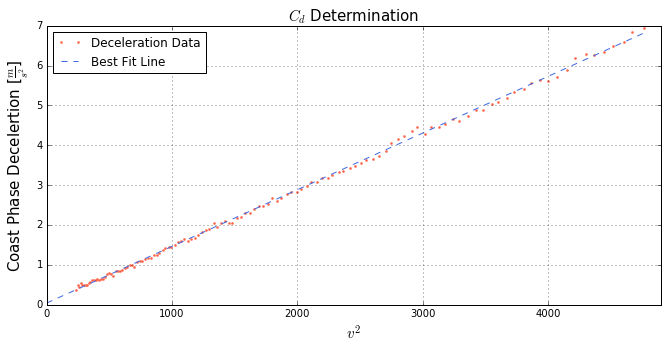

In [112]:
figure(figsize = (11, 5))
plot(v[90:-55]**2, -y[90:-55]-9.81, '.', markersize = 4, color = 'tomato', label = "Deceleration Data")
xlim(0, 70**2)
title(r'$C_{d}$ Determination', fontsize = 15)
xlabel(r'$v^{2}$', fontsize = 15)
ylabel('Coast Phase Decelertion'+ r' [$\frac{m}{s^{2}}$]', fontsize = 15)
grid()

slope, intercept = polyfit(v[90:-55]**2, y[90:-55]+9.81, 1)

vsquared = linspace(0, max(v[90:-55]**2), len(v[90:-55]))

plot(vsquared, -slope*vsquared - intercept, '--', color = 'royalblue', label = 'Best Fit Line')
legend(loc = 'best')
show()

Now, for the result!

Remember, $C_{d} = Q \frac{a}{v^{2}}$.

In [110]:
Cd = Q*slope

print "The rocket's drag coefficient is", -Cd

The rocket's drag coefficient is 0.441127493402


Don't worry about the minus sign. Admittedly, this is a very poor result. Streamlined objects can have coefficient values of 0.1. Bricks have a $C_{d}$ of 0.5. Our fluid models show that the drag coefficient of the rocket should be closer to 0.3. This time, however, we launched with an onboard camera protruding from the body, which significantly hurt our aerodynamics.

It should be mentioned that there are minute second-order effects that we ignored in the above analysis. We neglected to assume that the following "constants" actually depend slightly on other things:

* $C_{d}$ has a velocity dependence. Near Mach 1, it shoots up significantly. At low velocities, however, the noise of the detector and turbulence of the rocket far outweigh its effects, as can seen by the straightness of the data in the plot above. We will definitely need to take this into account with ** *E-1* **, as we'll be reaching speeds very near the sound speed.

* $A_{c}$ can effectively be larger when the air flow vector is misaligned with the rocket's vertical axis. That is, when it's windy, the rocket has a larger effective cross sectional area.

* $\rho_{air}$ changes as a function of pressure and temperature in the air. The higher you go, the lower your $\rho$.

### Density of Air

The drag force experienced by our rocket is also a function of the density of air. It is given by the formula

\begin{equation}
\rho_{air} = \frac{P}{R_{specific}T}
\end{equation}

where $T$ is the temperature in Kelvin, $P$ is the air pressure in $Pa$, and $R_{specific}$ is the gas constant for dry air.

The cool thing about our altimeter is that it measures both air pressure and temperature to very high precision. Let's use the parachute descent pressure and temperature data to look at the density of air as a function of altitude.

We redefine our data variables to include only the parachute descent data.

In [151]:
t = data['col1'][10095:-6449] - data['col1'][10090]
alt = data['col5'][10095:-6449]
temp = (data['col7'][10095:-6449]-32.)*0.5555 + 273.15 # converting to Kelvin
p = data['col6'][10095:-6449]*100 # converting to Pa

R_specific = 287.058 # Wikipedia

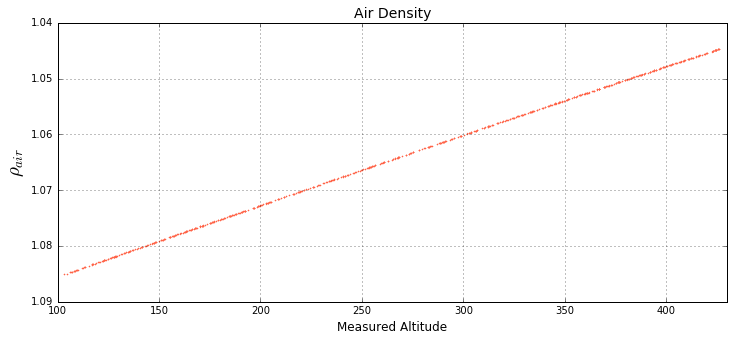

In [182]:
figure(figsize = (12, 5))
plot(alt, p/(R_specific*temp), '.', markersize = 1.8, color = 'tomato')
xlabel('Measured Altitude', fontsize = 12)
ylabel(r'$\rho_{air}$', fontsize = 19)
title('Air Density', fontsize = 14)

ylim(1.09, 1.04)
xlim(100, 430)
grid()
show()

Sweet! That's really cool and potentially useful. This tells us that the drag force felt by the rocket, all else being equal, varies by up to 4% due to the difference in air density. That is super important to keep in mind. What a rich dataset!

## Results

There's quite a lot of information to process here. Thankfully, bulletpoints and headers exist to keep our thoughts organized.

#### Altitudes and Velocities

The barometric and inertial altitude and velocity plots disagreed with each other significantly. The explanation here is simple, but comes in two parts. 

* The velocity deviation seen before motor burnout is actually a wind effect. Our payload bay has two holes in it to efficiently equilibrate the internal air pressure with the outside. When the rocket was traveling at high speeds, air flowed over the holes very quickly, creating low pressure regions that effectively reduced the pressure of the payload bay. This resulted in an erroneous measured increase in altitude, as the altimeter uses air pressure to compute altitude. Perhaps a way to mitigate this issue is to change the diameters of the pressure vents.


* The velocity and altitude deviation after motor burnout is the result of the rocket's inertial axis being misaligned relative to its axis of motion. That is, the accelerometer derives an altitude in the rocket's inertial frame, and the altimeter measures absolute altitude in the atmosphere. Because the rocket was flying through gusts of wind, it was traveling at some angle $\theta$ away from vertical. To calculate the true vertical extend of its velocity vector, we multiply the inertial velocity by $sin(\theta)$. However, since we did not have a gyroscope onboard, we had no bearing on the rocket's angle. This analysis shows that a gyroscope is necessary to best characterize the rocket's flight profile. Altimetry is unreliable at high velocities, and accelerometry alone assumes a vertical flight path. Lastly, we find that wind is a very serious factor that should be added to our numerical models.

#### Data Acquisition

The measured data rate was sub-nominal, and switched between 25 and 33 Hz unpredictably. The cause of this could be one of the following faults:

* The control loop is set to take short breaks at irregular intervals


* There is a feedback effect between the accelerometer and the altimeter, which use the same wire to communicate to the computer


* The altimeter cannot support high cadence readings

Additionally, the slope between consecutive pairs of altimetry measurements was zero. This could also potentially be the result of the faults listed above. These issues need to be resolved for the next set of flights. As of now, altimeter data is not a reliable source of flight data for high speed corrective adjustments.


#### Parachute Descent Rate

The parachute descent rate of the rocket was measured to be ~7 $\frac{m}{s}$, which is less than the maximum kinetic energy requirement of the rocket. However, the rocket accelerated down on average, demonstrating that parachute tangling reduced their efficiency over time. This was also found to be the case by inspection upon landing. Tangling is therefore important and needs to be accounted for.

#### Rocket Drag Coefficient

The rocket's $C_{d}$ was measured to be 0.44, which is poor. However, given that the rocket had an externally mounted video camera, this is not an unreasonable value. Flow simulations show that the rocket's true $C_{d}$ is approximately ~0.29. We will strive to minimize $C_{d}$ by studying different nose cone and tail cone shapes.

#### Air Density

The density of air is shown to be an important aspect in our modeling efforts. The density contrast over 300 meters of altitude is ~4%. We will update our numerical models to input a density profile for the atmosphere.

## Conclusions

The * **Effective-0.25** * flight dataset is rich and yields a lot of information about the rocket's characteristics and performance. This analysis shows that flight sensors are incredibly useful in understanding the properties of a launch, and are an effective way to control a flight profile.

Modeling work needs to be done to quantify the effects of wind on a launch, the control loop needs to be improved and better-characterized, and a gyroscope needs to be added to the payload for angle measurements. 

Hopefully this was a revelatory look into how I do things. In no way is this the best way to analyze this dataset, but it makes a lot of sense to me. Let me know if you have any questions!